In [ ]:
%pip install torch_geometric
%pip install tensorboardX

In [ ]:
%python train_model.py

In [ ]:
#%python testing_model.py

In [1]:
import torch
import os
from model import GNNImageClassificator
from datasets import build_train_val_dataloaders

best_model_saved_path = 'model_weight'

# computation device
device = ('cuda' if torch.cuda.is_available() else 'cpu')

# build the model
model = GNNImageClassificator(in_channels=3, hidden_dim=64).to(device)

# load the best model checkpoint
best_model_cp = torch.load(os.path.join(best_model_saved_path,'best_model.pth'), map_location=device)
best_model_epoch = best_model_cp['epoch']

# load the last model checkpoint
last_model_cp = torch.load(os.path.join(best_model_saved_path,'final_model.pth'), map_location=device)
last_model_epoch = last_model_cp['epoch']

# get the test dataset and the test data loader
train_loader, valid_loader, test_loader = build_train_val_dataloaders()

In [2]:
#Analyzing the dataset
data = train_loader.dataset
print("="*90)
print("dataset type: ", type(data))
print("dataset features: ", data.num_features)
print("dataset target: ", data.num_classes)
print("dataset length: ", data.len)
print("dataset sample: ", data[0])
print("sample nodes: ", data[0].num_nodes)
print("sample edges: ", data[0].num_edges)
print("="*90)

dataset type:  <class 'torch_geometric.datasets.mnist_superpixels.MNISTSuperpixels'>
dataset features:  1
dataset target:  10
dataset length:  <bound method InMemoryDataset.len of MNISTSuperpixels(60000)>
dataset sample:  Data(x=[75, 1], edge_index=[2, 1399], y=[1], pos=[75, 2])
sample nodes:  75
sample edges:  1399


In [3]:
from testing_model import test_last_model, test_best_model

lst_acc, prediction_result_last_model = test_last_model(model, last_model_cp, test_loader)
bst_acc, prediction_result_best_model = test_best_model(model, best_model_cp, test_loader)

Computation device: cpu

Best model was saved at 9 epochs

Last model was saved at 10 epochs

Loading last epoch saved model weights...
Testing


  0%|          | 0/157 [00:00<?, ?it/s]

Last epoch saved model accuracy: 62.010
Loading best epoch saved model weights...
Testing


  0%|          | 0/157 [00:00<?, ?it/s]

Best epoch saved model accuracy: 64.330


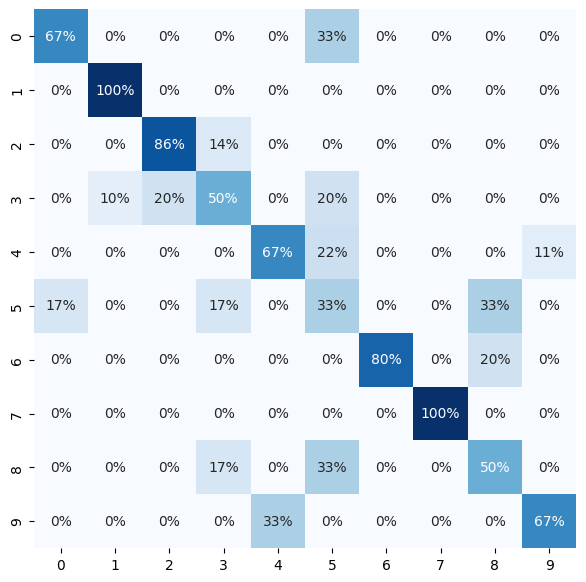

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

prediction_to_plot = prediction_result_best_model if bst_acc > lst_acc else prediction_result_last_model

epoch_to_plot = 12
prediction_to_plot.get(f'epoch_{epoch_to_plot}')
true_l = prediction_to_plot.get(f'epoch_{epoch_to_plot}')[0]['true_label']
pred_l = prediction_to_plot.get(f'epoch_{epoch_to_plot}')[1]['predict_label']

class_names = [n for n in range(10)]
cf_matrix = confusion_matrix(true_l.data.cpu().numpy(), pred_l.data.cpu().numpy(), normalize='true')
df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names], columns = [i for i in class_names])
plt.figure(figsize = (7,7))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='.0%', cbar=False)
plt.show()

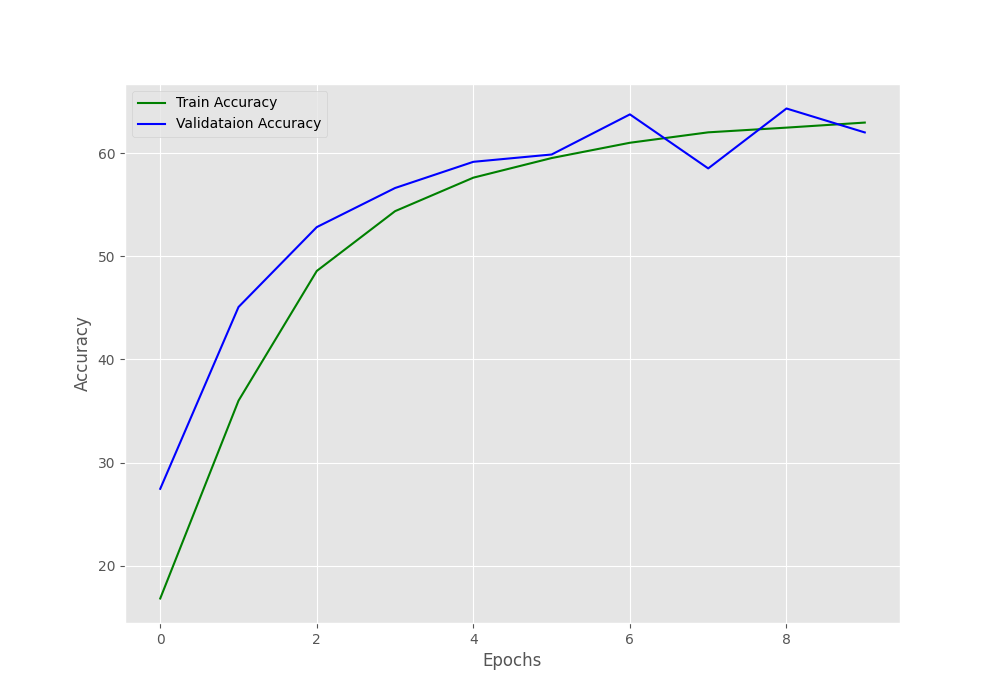

In [6]:
from IPython.display import Image

Image(filename='result_plot/Accuracy.png', width=600, height=480)

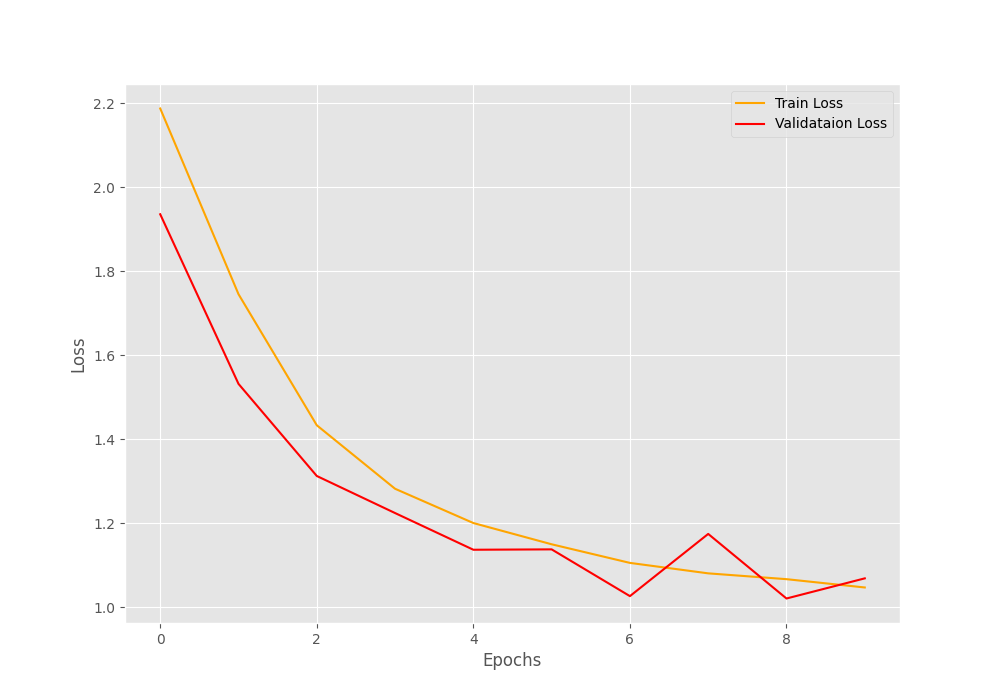

In [7]:
Image(filename='result_plot/Loss.png', width=600, height=480)

In [8]:
from torchvision.datasets import MNIST
from visualize import visualize
import math

Image True Label: 5 Image Predict Label:  3


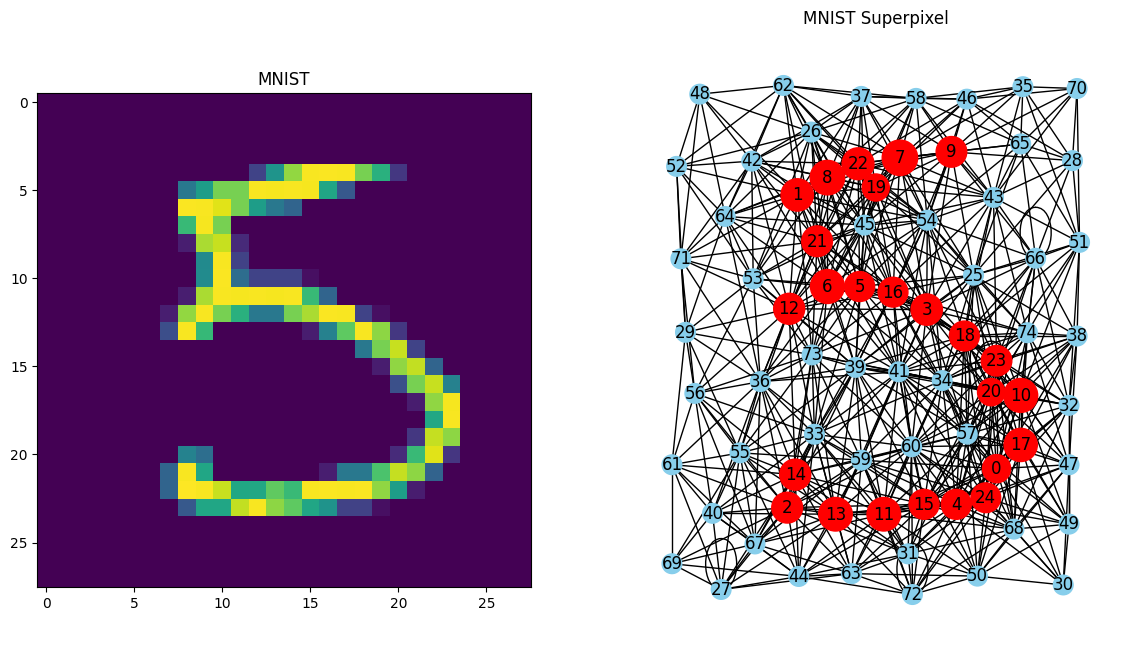

In [9]:
image_dataset = MNIST(root='./mnist', download=True, train=False)

example = 15
num_sample = len(test_loader.dataset)
batch_size = 64

epoch_to_select = example // math.ceil(num_sample/batch_size)
final_example = example if example <= 64 else example % batch_size

predicton = prediction_to_plot[f'epoch_{epoch_to_select}'][1]['predict_label'][final_example].data.cpu()

image, label = image_dataset[example]
data = test_loader.dataset[example]

print("Image True Label:", label , "Image Predict Label: ", predicton.tolist())

visualize(image, data)